In [34]:
import datetime
import sys, os
import quandl
import quandl
import getpass
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import pickle
from tqdm.notebook import tqdm
import re

In [36]:
plt.rcParams["figure.figsize"] = (18,9)
plt.style.use('fivethirtyeight')
sns.set(style='white', context='notebook', palette='deep')

pd.options.display.max_rows = 20
pd.options.display.max_seq_items = 50
pd.set_option('display.max_colwidth', 200)

In [15]:
!pip install quandl

In [18]:
quandl.ApiConfig.api_key = getpass.getpass('EKGAi1Gs1_UBQNnxA_Rj')

data = quandl.get("FRED/DFEDTAR", start_date="1980-01-01")

EKGAi1Gs1_UBQNnxA_Rj ····················


In [19]:
data

,VALUE
DATE,
1982-09-27,10.25
1982-09-28,10.25
1982-09-29,10.25
1982-09-30,10.25
1982-10-01,10.00
...,...
2008-12-11,1.00
2008-12-12,1.00
2008-12-13,1.00


In [33]:
#quandl.ApiConfig.api_key = getpass.getpass('EKGAi1Gs1_UBQNnxA_Rj')

# before 2008 only one value after it becomes a range
fedtar = quandl.get("FRED/DFEDTAR", start_date="1980-01-01")
fedtar.columns=['Rate']
fedtaru = quandl.get("FRED/DFEDTARU", start_date="1980-01-01")
fedtaru.columns=['Rate']
fedtarl = quandl.get("FRED/DFEDTARL", start_date="1980-01-01")
fedtarl.columns=['Rate']
fedrate_df = pd.concat([fedtar, fedtarl], axis=0)
#fedrate_df.index = pd.to_datetime(fedrate_df.Date, format="%Y-%m-%d")
# fedrate_df.drop(columns=['Date'], inplace=True)
fedrate_df['Rate'] = fedrate_df['Rate'].map(lambda x: np.float(x))
# Add difference from previous value
fedrate_df['diff'] = fedrate_df['Rate'].diff()
fedrate_df

<ipython-input-33-d10cf2444af5>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fedrate_df['Rate'] = fedrate_df['Rate'].map(lambda x: np.float(x))


,Rate,diff
1982-09-27,10.25,NaN
1982-09-28,10.25,0.00
1982-09-29,10.25,0.00
1982-09-30,10.25,0.00
1982-10-01,10.00,-0.25
...,...,...
2022-03-23,0.25,0.00
2022-03-24,0.25,0.00
2022-03-25,0.25,0.00
2022-03-26,0.25,0.00


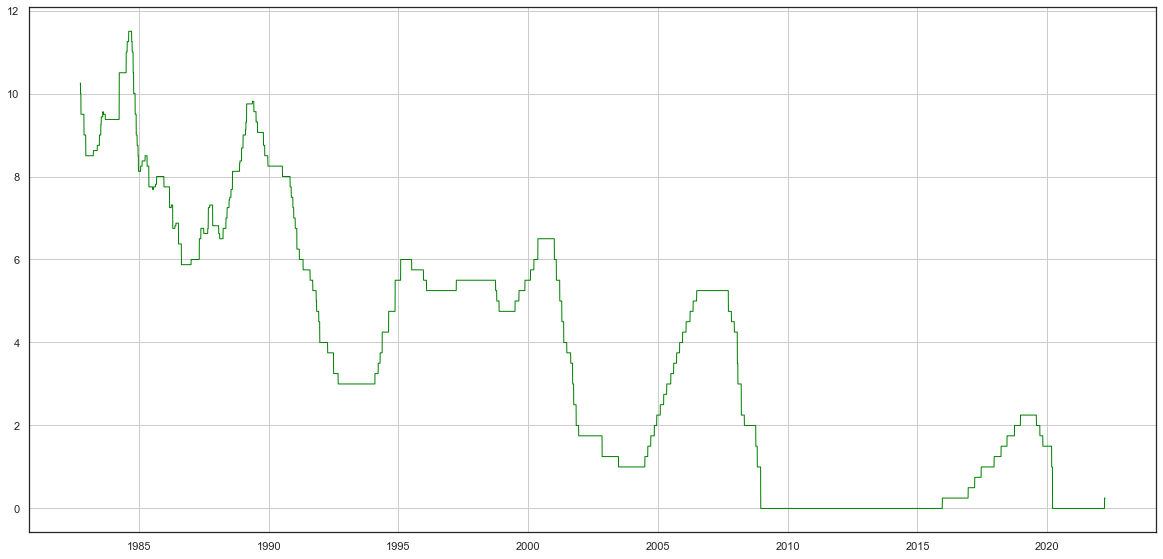

In [37]:
fig, ax = plt.subplots()
ax.plot(fedrate_df.index, fedrate_df['Rate'].values, 
         c = 'green',
         linewidth= 1.0)
ax.grid(True)
plt.show()

### Effective FED Rate

In [39]:
dff = quandl.get("FRED/DFF", start_date="1980-01-01")
dff.columns=['DFF']
dff['diff'] = dff['DFF'].diff()
dff

,DFF,diff
Date,,
1980-01-01,14.77,NaN
1980-01-02,14.00,-0.77
1980-01-03,13.89,-0.11
1980-01-04,14.00,0.11
1980-01-05,14.00,0.00
...,...,...
2022-03-21,0.33,0.00
2022-03-22,0.33,0.00
2022-03-23,0.33,0.00


(515, 2)


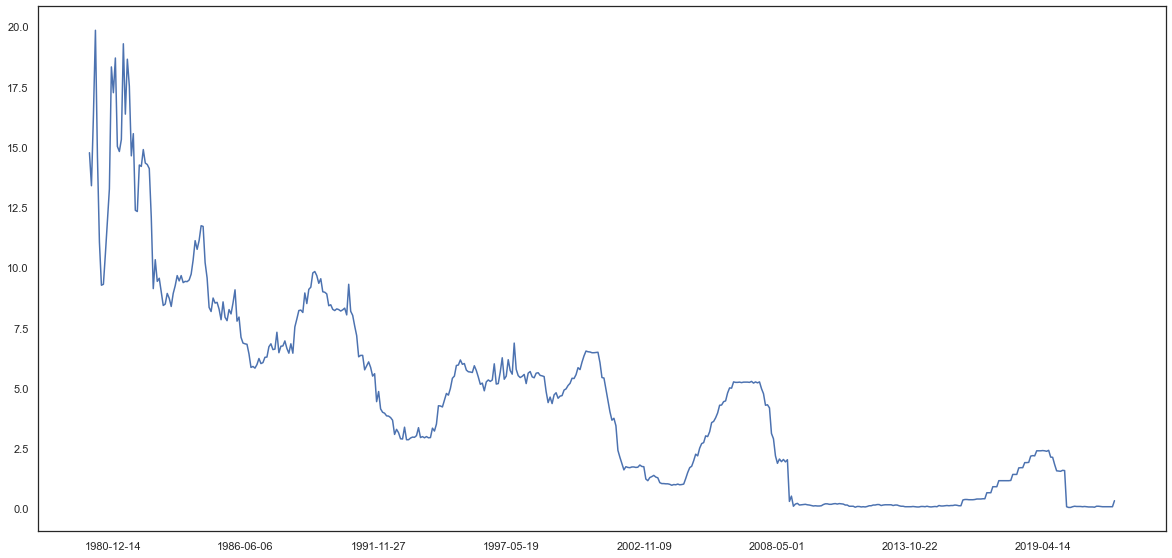

In [40]:
dff_30 = dff.iloc[::30, :]
print(dff_30.shape)

fig, ax = plt.subplots()
ax.plot(dff_30.index.values, dff_30['DFF'].values)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2000))
plt.show()

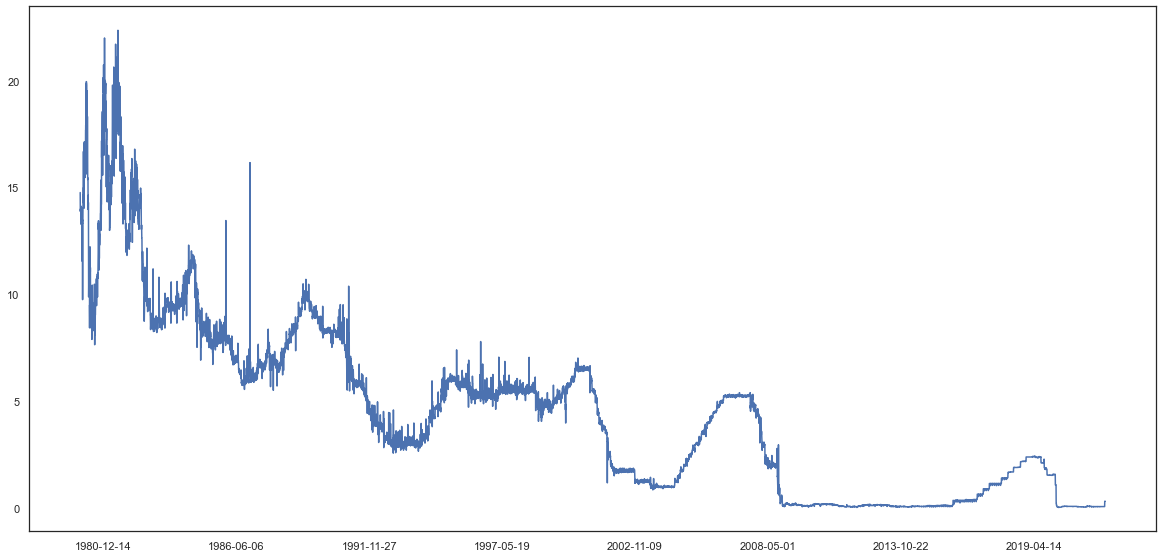

In [41]:
fig, ax = plt.subplots()
ax.plot(dff.index.values, dff['DFF'].values)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2000))
plt.show()

In [43]:
dff.tail(10)

,DFF,diff
Date,,
2022-03-16,0.08,0.00
2022-03-17,0.33,0.25
2022-03-18,0.33,0.00
2022-03-19,0.33,0.00
2022-03-20,0.33,0.00
2022-03-21,0.33,0.00
2022-03-22,0.33,0.00
2022-03-23,0.33,0.00
2022-03-24,0.33,0.00


In [46]:
#GDP
gdpc1=quandl.get("FRED/GDPC1", start_date="1980-01-01")
gdpc1.columns=['GDPC1']
gdpc1['diff_prev'] = gdpc1['GDPC1'].diff() / gdpc1['GDPC1'].shift(1) * 100
gdpc1['diff_year'] = gdpc1['GDPC1'].diff(periods=4) / gdpc1['GDPC1'].shift(4) * 100
gdpc1

,GDPC1,diff_prev,diff_year
Date,,,
1980-01-01,6842.024,NaN,NaN
1980-04-01,6701.046,-2.060472,NaN
1980-07-01,6693.082,-0.118847,NaN
1980-10-01,6817.903,1.864926,NaN
1981-01-01,6951.495,1.959429,1.599980
...,...,...,...
2020-10-01,18767.778,1.115277,-2.262915
2021-01-01,19055.655,1.533890,0.546977
2021-04-01,19368.310,1.640747,12.226677


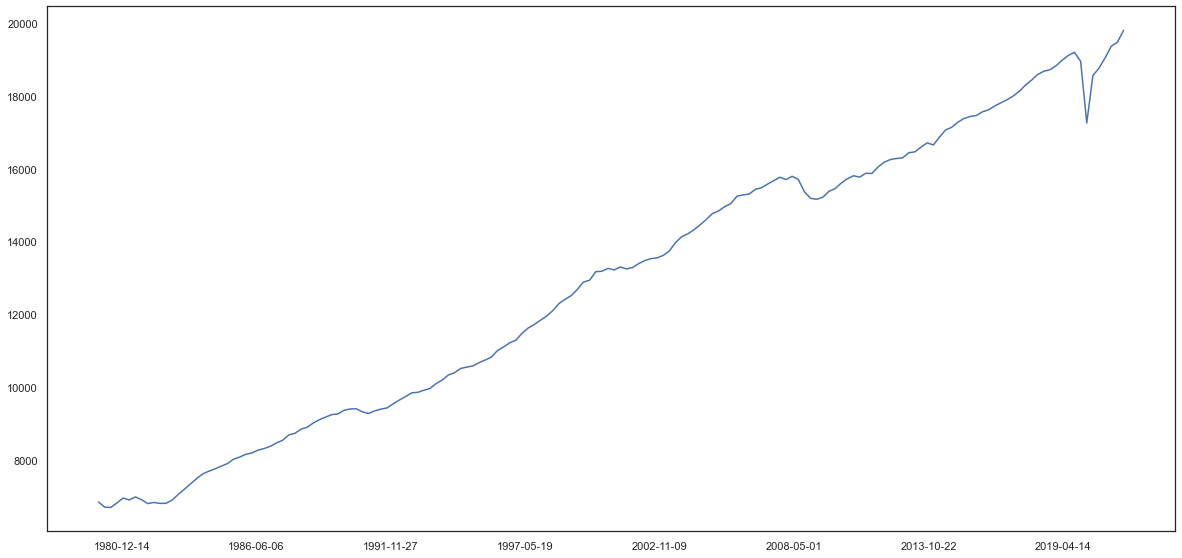

In [47]:
fig, ax = plt.subplots()
ax.plot(gdpc1.index.values, gdpc1['GDPC1'].values)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2000))
plt.show()

In [49]:
gdppot=quandl.get("FRED/GDPPOT", start_date="1980-01-01")
#gdppot = pd.read_csv(filename, names=['DATE', 'GDPPOT'], header=0)
#gdppot = gdppot.set_index(pd.to_datetime(gdppot['DATE'], format="%Y-%m-%d")).drop(columns=['DATE'])
# Add difference from previous value
gdppot.columns=['GDPPOT']
gdppot['diff_prev'] = gdppot['GDPPOT'].diff() / gdppot['GDPPOT'].shift(1) * 100
gdppot['diff_year'] = gdppot['GDPPOT'].diff(periods=4) / gdppot['GDPPOT'].shift(4) * 100
gdppot

,GDPPOT,diff_prev,diff_year
Date,,,
1980-01-01,6847.481683,NaN,NaN
1980-04-01,6890.146039,0.623066,NaN
1980-07-01,6928.061362,0.550283,NaN
1980-10-01,6968.010712,0.576631,NaN
1981-01-01,7012.104757,0.632807,2.404140
...,...,...,...
2030-10-01,23423.370000,0.423458,1.708386
2031-01-01,23522.550000,0.423423,1.706249
2031-04-01,23622.050000,0.422998,1.704632


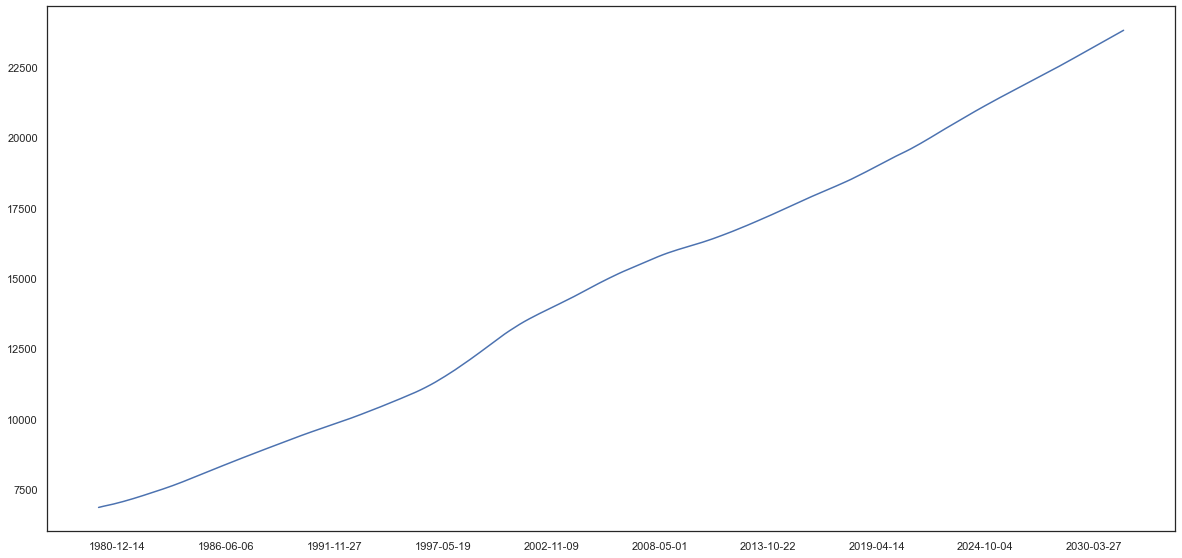

In [50]:
fig, ax = plt.subplots()
ax.plot(gdppot.index.values, gdppot['GDPPOT'].values)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2000))
plt.show()

In [51]:
# Add difference from previous value
pcepilfe=quandl.get("FRED/PCEPILFE", start_date="1980-01-01")
pcepilfe.columns=['PCEPILFE']
pcepilfe['diff_prev'] = pcepilfe['PCEPILFE'].diff() / pcepilfe['PCEPILFE'].shift(1) * 100
pcepilfe['diff_year'] = pcepilfe['PCEPILFE'].diff(periods=12) / pcepilfe['PCEPILFE'].shift(12) * 100
pcepilfe

,PCEPILFE,diff_prev,diff_year
Date,,,
1980-01-01,39.095,NaN,NaN
1980-02-01,39.485,0.997570,NaN
1980-03-01,39.851,0.926934,NaN
1980-04-01,40.056,0.514416,NaN
1980-05-01,40.378,0.803875,NaN
...,...,...,...
2021-08-01,118.073,0.313498,3.599161
2021-09-01,118.357,0.240529,3.702763
2021-10-01,118.881,0.442728,4.156409


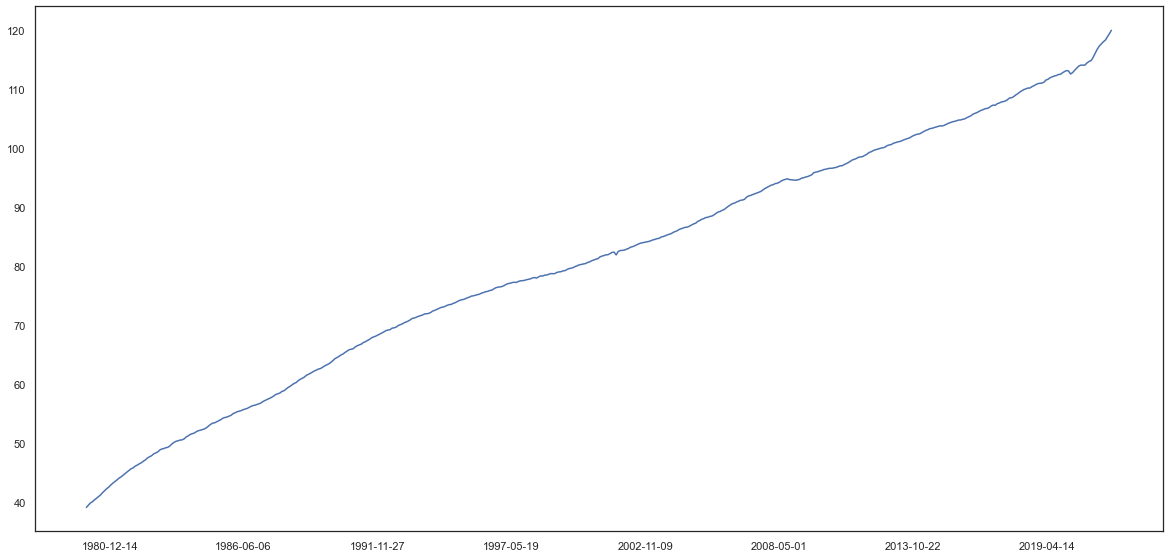

In [52]:
fig, ax = plt.subplots()
ax.plot(pcepilfe.index.values, pcepilfe['PCEPILFE'].values)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2000))
plt.show()

In [53]:
cpiaucsl=quandl.get("FRED/CPIAUCSL", start_date="1980-01-01")
cpiaucsl.columns=['CPIAUCSL']
cpiaucsl['diff_prev'] = cpiaucsl['CPIAUCSL'].diff() / cpiaucsl['CPIAUCSL'].shift(1) * 100
cpiaucsl['diff_year'] = cpiaucsl['CPIAUCSL'].diff(periods=12) / cpiaucsl['CPIAUCSL'].shift(12) * 100
cpiaucsl

,CPIAUCSL,diff_prev,diff_year
Date,,,
1980-01-01,78.000,NaN,NaN
1980-02-01,79.000,1.282051,NaN
1980-03-01,80.100,1.392405,NaN
1980-04-01,80.900,0.998752,NaN
1980-05-01,81.700,0.988875,NaN
...,...,...,...
2021-09-01,274.214,0.410851,5.389907
2021-10-01,276.590,0.866477,6.236941
2021-11-01,278.524,0.699230,6.828372


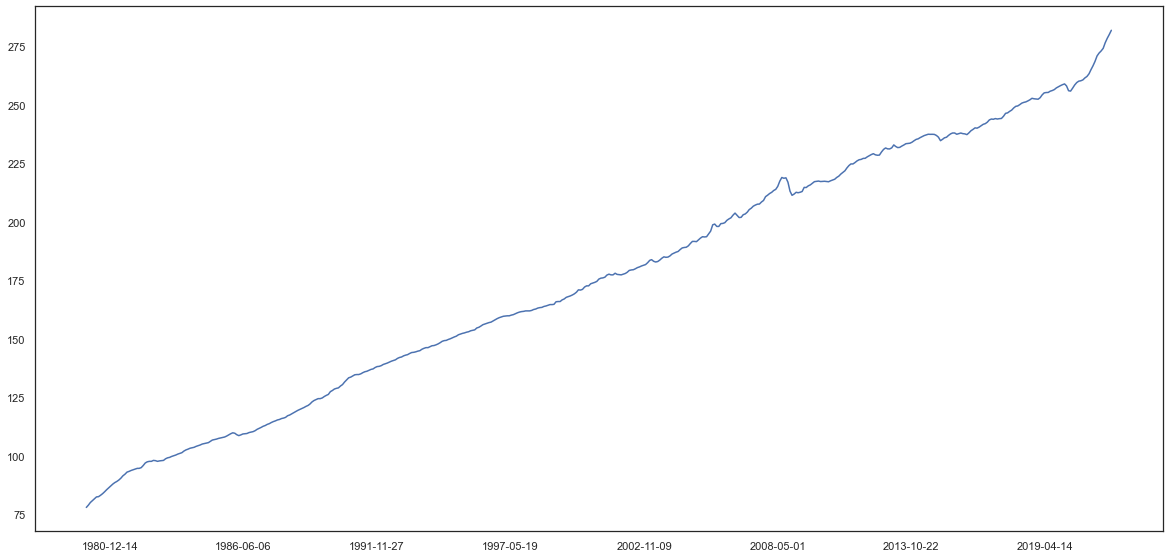

In [54]:
fig, ax = plt.subplots()
ax.plot(cpiaucsl.index.values, cpiaucsl['CPIAUCSL'].values)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2000))
plt.show()

In [67]:
treasury_q=quandl.get("USTREASURY/YIELD", start_date="1980-01-01")


In [68]:
treasury_q

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,0.03,0.13,0.22,0.49,0.78,1.18,1.39,1.62,1.75,1.79,2.17,2.11
2022-02-01,0.04,0.10,0.19,0.48,0.78,1.18,1.39,1.63,1.76,1.81,2.19,2.12
2022-02-02,0.04,0.10,0.19,0.45,0.76,1.16,1.38,1.60,1.74,1.78,2.17,2.11


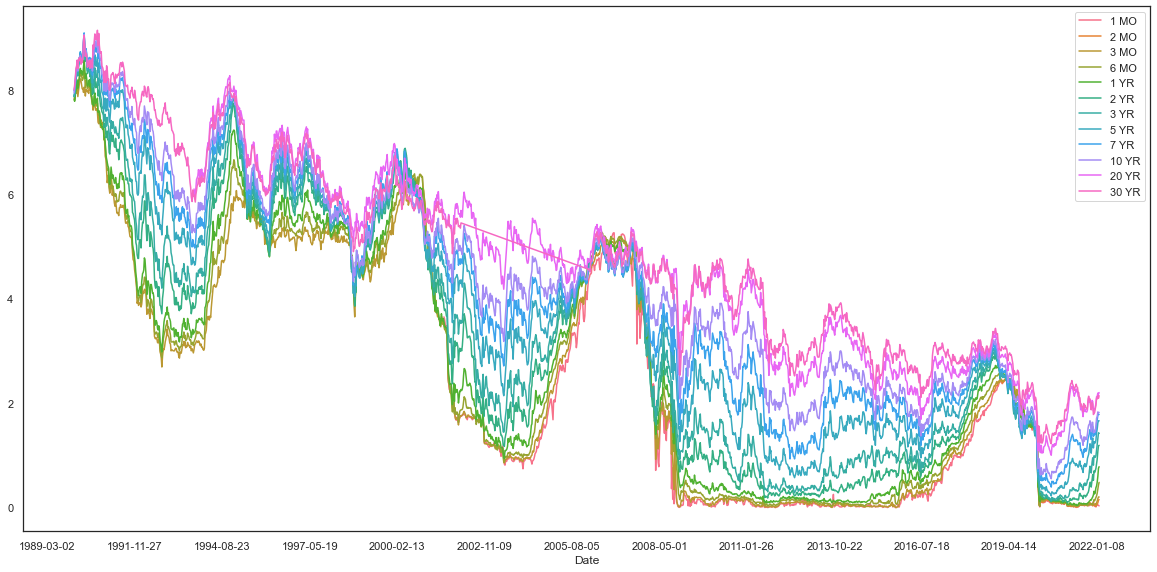

In [69]:
treasury_q_5 = treasury_q.iloc[::5, :]

fig, ax = plt.subplots()
ax = sns.lineplot(data = treasury_q_5, dashes=False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
plt.show()